# Multimodal Cost Optimization with Service Level Constraints

## 1) Problem Statement

The goal of this project is to optimize the assignment of shipping routes for customer orders in a supply chain network involving multiple warehouses, ports, carriers, and products.

**Core Objectives**

Minimize the total supply chain cost (including freight, storage, and operational costs) while respecting real-world constraints such as:

- Warehouse capacities
- Delivery service level agreements (SLAs)
- Allowed warehouse-product-customer links
- Transportation time (TPT)
- Shipping port connections
- Freight lane restrictions

## 2) Data Collection

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [17]:
df = pd.read_excel('D:\\01 VINESH_0\\Machine Learning\\Projects\\ML\\RouteOptimisation\\data\\Supply chain logisitcs problem.xlsx')

#### Show Top 5 Records

In [18]:
df.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


#### Shape of the dataset

In [19]:
df.shape

(9215, 14)

## 3) Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [20]:
#missing values:
df.isnull().sum()

Order ID                0
Order Date              0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Product ID              0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [21]:
#duplicates:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [22]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              9215 non-null   float64       
 1   Order Date            9215 non-null   datetime64[ns]
 2   Origin Port           9215 non-null   object        
 3   Carrier               9215 non-null   object        
 4   TPT                   9215 non-null   int64         
 5   Service Level         9215 non-null   object        
 6   Ship ahead day count  9215 non-null   int64         
 7   Ship Late Day count   9215 non-null   int64         
 8   Customer              9215 non-null   object        
 9   Product ID            9215 non-null   int64         
 10  Plant Code            9215 non-null   object        
 11  Destination Port      9215 non-null   object        
 12  Unit quantity         9215 non-null   int64         
 13  Weight            

### 3.4 Checking the number of unique values of each column

In [23]:
#unique values:
df.nunique()

Order ID                9215
Order Date                 1
Origin Port                3
Carrier                    3
TPT                        5
Service Level              3
Ship ahead day count       5
Ship Late Day count        4
Customer                  46
Product ID               772
Plant Code                 7
Destination Port           1
Unit quantity           2624
Weight                  5899
dtype: int64

### 3.5 Check statistics of data set

In [24]:
#statistics
df.describe()

,Order ID,Order Date,TPT,Ship ahead day count,Ship Late Day count,Product ID,Unit quantity,Weight
count,9.215000e+03,9215,9215.000000,9215.000000,9215.000000,9.215000e+03,9215.000000,9215.000000
mean,1.447274e+09,2013-05-26 00:00:00,1.717743,1.852306,0.039935,1.680536e+06,3202.747151,19.871688
min,1.447126e+09,2013-05-26 00:00:00,0.000000,0.000000,0.000000,1.613321e+06,235.000000,0.000000
25%,1.447197e+09,2013-05-26 00:00:00,1.000000,0.000000,0.000000,1.669702e+06,330.000000,1.407430
50%,1.447276e+09,2013-05-26 00:00:00,2.000000,3.000000,0.000000,1.683636e+06,477.000000,4.440000
75%,1.447346e+09,2013-05-26 00:00:00,2.000000,3.000000,0.000000,1.689554e+06,1275.500000,13.325673
max,1.447425e+09,2013-05-26 00:00:00,4.000000,6.000000,6.000000,1.702654e+06,561847.000000,2338.405126
std,8.381629e+04,NaN,0.630500,1.922302,0.319625,1.526593e+04,15965.622260,66.569064


#### **Insights**

- The dataset contains 9,215 orders, all placed on the same date (2013-05-26), indicating a single-day snapshot.
- The average transportation time (TPT) is 1.72 days, with a median of 2 days; TPT ranges from 0 to 4 days, showing variability in delivery times.
- Orders are shipped ahead of schedule by an average of 1.85 days, with some shipped up to 6 days early; the median is 2 days ahead.
- Ship late day count is low on average (0.04 days), but some orders are shipped up to 6 days late, indicating occasional delays.
- Unit quantity per order varies widely, from 235 to 561,847 units, with a mean of 3,203 units and a high standard deviation, reflecting diverse order sizes.
- Order weights also show significant variation, ranging from 0 to 2,338 kg, with an average of about 20 kg and a standard deviation of 66.6 kg, suggesting a mix of small and large shipments.
- Product IDs are distributed within a narrow range, implying a focused set of products being ordered on this day.
- The data highlights both early and late shipments, as well as large fluctuations in order size and weight, suggesting opportunities for optimizing scheduling and warehouse capacity utilization.

### 3.6 Exploring Data

In [25]:
df.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [26]:
print("Categories in 'Origin Port' variable:     ",end=" " )
print(df['Origin Port'].unique())

print("Categories in 'Origin Port' variable:  ",end=" ")
print(df['Origin Port'].unique())

print("Categories in 'Service Level' variable:",end=" " )
print(df['Service Level'].unique())

print("Categories in 'Customer' variable:     ",end=" " )
print(df['Customer'].unique())

print("Categories in 'Plant Code' variable:     ",end=" " )
print(df['Plant Code'].unique())

print("Categories in 'Destination Port' variable:     ",end=" " )
print(df['Destination Port'].unique())



Categories in 'Origin Port' variable:      ['PORT09' 'PORT04' 'PORT05']
Categories in 'Origin Port' variable:   ['PORT09' 'PORT04' 'PORT05']
Categories in 'Service Level' variable: ['CRF' 'DTP' 'DTD']
Categories in 'Customer' variable:      ['V55555_53' 'V555555555555555_29' 'V5555555_30' 'V55555_2'
 'V555555555555_31' 'V55555555_32' 'V5555555_12' 'V55555_4' 'V555555_6'
 'V5555555555_1' 'V5555_33' 'V555555_24' 'V555555555_3' 'V55555555_5'
 'V55555555_7' 'V55555555555_28' 'V55555555_0' 'V5555555_22' 'V555555_34'
 'V5555_25' 'V55_13' 'V555555555_35' 'V5555_36' 'V55_37' 'V5555_38'
 'V55_39' 'V555555555_14' 'V55555_26' 'V555_15' 'V555555555_27'
 'V555555_40' 'V555_41' 'V555555555555555555_42' 'V55555555555555_8'
 'V55555555_9' 'V55555_10' 'V555555_11' 'V5555555555555_16'
 'V555555555555555555_17' 'V555555555555555_44' 'V555555555555555555_45'
 'V555555555555555_23' 'V555555555555555555_46' 'V55_47' 'V5555555_19'
 'V5555_20']
Categories in 'Plant Code' variable:      ['PLANT16' 'PLANT03' 'P

In [27]:
#define numerical and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Order ID', 'Order Date', 'TPT', 'Ship ahead day count', 'Ship Late Day count', 'Product ID', 'Unit quantity', 'Weight']

We have 6 categorical features : ['Origin Port', 'Carrier', 'Service Level', 'Customer', 'Plant Code', 'Destination Port']


In [28]:
#Value counts per categorical column:

categorical_cols = ['Origin Port', 'Carrier', 'Service Level', 'Customer', 'Plant Code', 'Destination Port']

for col in categorical_cols:
    print(f"\n{col} value counts:\n", df[col].value_counts())



Origin Port value counts:
 Origin Port
PORT04    9041
PORT09     173
PORT05       1
Name: count, dtype: int64

Carrier value counts:
 Carrier
V444_0    6264
V444_1    2097
V44_3      854
Name: count, dtype: int64

Service Level value counts:
 Service Level
DTP    6218
DTD    2143
CRF     854
Name: count, dtype: int64

Customer value counts:
 Customer
V55555555555555_8         976
V555555_6                 762
V55555_2                  758
V5555555_22               693
V5555_33                  691
V55555555_7               618
V55555555_5               531
V555555555_27             521
V555555555555555_29       385
V55555_4                  360
V555555555_14             351
V55555_26                 340
V55555555_32              241
V55555555555_28           203
V555555555555555555_45    198
V55_13                    178
V5555555_30               163
V555555555_3              141
V55555_53                 139
V555555_24                125
V5555555_19               118
V555555555555555

#### **Insights**

- **Origin Port:** The vast majority of shipments (9041 out of 9215) originate from PORT04, making it the dominant origin port. PORT09 and PORT05 are used very rarely.
- **Destination Port:** All shipments are sent to PORT09, indicating a single-destination network for this dataset.
- **Carrier:** Carrier V444_0 handles most shipments (6264), followed by V444_1 (2097) and V44_3 (854), showing a strong preference for one main carrier.
- **Service Level:** The DTP service level is most common (6218 orders), with DTD (2143) and CRF (854) used less frequently, suggesting a standard or preferred shipping service.
- **Customer:** The customer base is highly concentrated, with the top few customers (e.g., V55555555555555_8, V555555_6, V55555_2) accounting for a significant share of orders, while many customers have very few orders.
- **Plant Code:** Most orders are fulfilled from PLANT03 (8541), with a small number coming from other plants, reflecting a centralized fulfillment model.
- **Overall:** The data shows a highly centralized logistics operation, with most shipments routed through a single origin port, plant, carrier, and destination port, and a small number of customers and service levels dominating the order volume.


## 4) Exploring Data (Visualisation)

### 4.1 Basic Plots

In [29]:
# # Orders per Origin Port:
# sns.countplot(data=df, x='Origin Port')
# plt.title('Number of Orders per Origin Port')
# plt.xticks(rotation=45)
# plt.show()

# #Top 10 Customers by Order Count:
# df['Customer'].value_counts().head(10).plot(kind='bar')
# plt.title('Top 10 Customers by Order Volume')
# plt.xlabel('Customer')
# plt.ylabel('Order Count')
# plt.show()

# # Service Level Distribution:
# sns.countplot(data=df, x='Service Level')
# plt.title('Distribution of Service Levels')
# plt.show()

# Create a figure with 3 subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Orders per Origin Port
sns.countplot(data=df, x='Origin Port', ax=axes[0])
axes[0].set_title('Number of Orders per Origin Port')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Top 10 Customers by Order Count
df['Customer'].value_counts().head(10).plot(kind='bar', ax=axes[1])
axes[1].set_title('Top 10 Customers by Order Volume')
axes[1].set_xlabel('Customer')
axes[1].set_ylabel('Order Count')

# Plot 3: Service Level Distribution
sns.countplot(data=df, x='Service Level', ax=axes[2])
axes[2].set_title('Distribution of Service Levels')

plt.tight_layout()
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\VINESH\anaconda3\envs\rasaenv\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\VINESH\AppData\Local\Temp\ipykernel_24304\2852891132.py", line 20, in <module>
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
  File "c:\Users\VINESH\anaconda3\envs\rasaenv\lib\site-packages\matplotlib\pyplot.py", line 1453, in subplots
    --------
  File "c:\Users\VINESH\anaconda3\envs\rasaenv\lib\site-packages\matplotlib\pyplot.py", line 806, in figure
    _pylab_helpers.Gcf.set_active(num.canvas.manager)
  File "c:\Users\VINESH\anaconda3\envs\rasaenv\lib\site-packages\matplotlib\pyplot.py", line 324, in new_figure_manager
    # If the manager explicitly overrides pyplot_show, use it even if a global
  File "c:\Users\VINESH\anaconda3\envs\rasaenv\lib\site-packages\matplotlib\pyplot.py", line 314, in _warn_if_gui_out_of_main_thread
    if matplotlib.is_i

### 4.2 Unit Quantity vs Weight

In [31]:
#correlation and outliers

sns.scatterplot(data=df, x='Unit quantity', y='Weight')
plt.title("Unit Quantity vs Weight")
plt.xlabel("Units Ordered")
plt.ylabel("Weight (kg)")
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\VINESH\anaconda3\envs\rasaenv\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\VINESH\AppData\Local\Temp\ipykernel_24304\499624702.py", line 3, in <module>
    sns.scatterplot(data=df, x='Unit quantity', y='Weight')
  File "c:\Users\VINESH\anaconda3\envs\rasaenv\lib\site-packages\seaborn\relational.py", line 626, in scatterplot
    ax = plt.gca()
  File "c:\Users\VINESH\anaconda3\envs\rasaenv\lib\site-packages\matplotlib\pyplot.py", line 2272, in gca
    else:
  File "c:\Users\VINESH\anaconda3\envs\rasaenv\lib\site-packages\matplotlib\pyplot.py", line 865, in gcf
  File "c:\Users\VINESH\anaconda3\envs\rasaenv\lib\site-packages\matplotlib\pyplot.py", line 806, in figure
    _pylab_helpers.Gcf.set_active(num.canvas.manager)
  File "c:\Users\VINESH\anaconda3\envs\rasaenv\lib\site-packages\matplotlib\pyplot.py", line 324, in new_figure_manage

#### **Insights**

Most orders are small to medium in size and weight, but there's a wide variation in weight for the same unit quantity, indicating diverse product densities. A few large-volume orders are relatively lightweight, suggesting potential for shipping cost optimization through mode or carrier selection. Outliers reveal heavy low-quantity items and light high-quantity items, both important for route planning and cost modeling.

### 4.3 Shipment Timeliness

#### 4.3.1  Distribution of TPT (transport time)

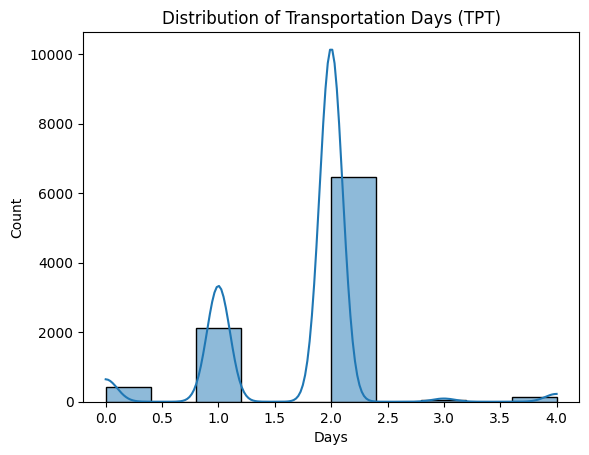

In [ ]:
#Distribution of TPT (transport time):

sns.histplot(df['TPT'], bins=10, kde=True)
plt.title('Distribution of Transportation Days (TPT)')
plt.xlabel('Days')
plt.show()

##### **Insights**

- TPT (Transportation Days) = number of days it takes to deliver an order.
- Most shipments are completed within 2 days, with some in 1 day.
- There's a sharp peak at 2 days, suggesting it's the standard delivery time.
- A few shipments are faster (1 or 0 days) or slightly slower (up to 4 days), but they are outliers.

#### 4.3.2 Early vs Late Shipping

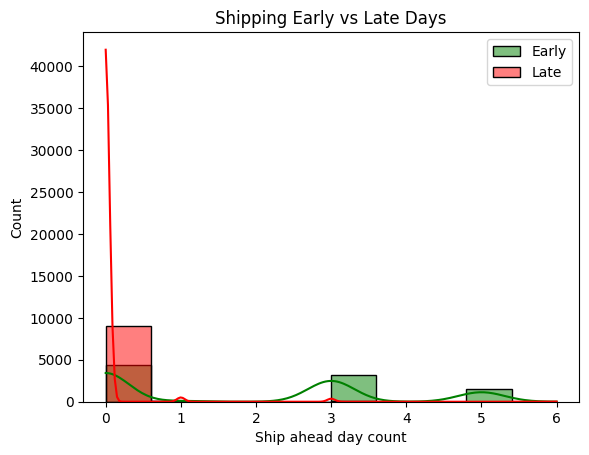

In [ ]:
#Early vs Late Shipping:
sns.histplot(df['Ship ahead day count'], bins=10, color='green', label='Early', kde=True)
sns.histplot(df['Ship Late Day count'], bins=10, color='red', label='Late', kde=True)
plt.title('Shipping Early vs Late Days')
plt.legend()
plt.show()


Green bars (Early) = how many days ahead of schedule orders are shipped.  
Red bars (Late) = how many days orders are delayed past the planned date.

##### **Insights**

- Most orders are shipped ahead of schedule (especially 3 days early).
- Very few are shipped late — and even those are mostly just 1 day late.
- Early shipments dominate the graph. This might mean:
 - Over-buffering time, which may lead to unnecessary early warehousing costs.
 - There's room to fine-tune schedules and cost optimization.

### 4.4 Identify Optimization Opportunities

#### 4.4.1 Most overloaded plants (by Unit quantity)

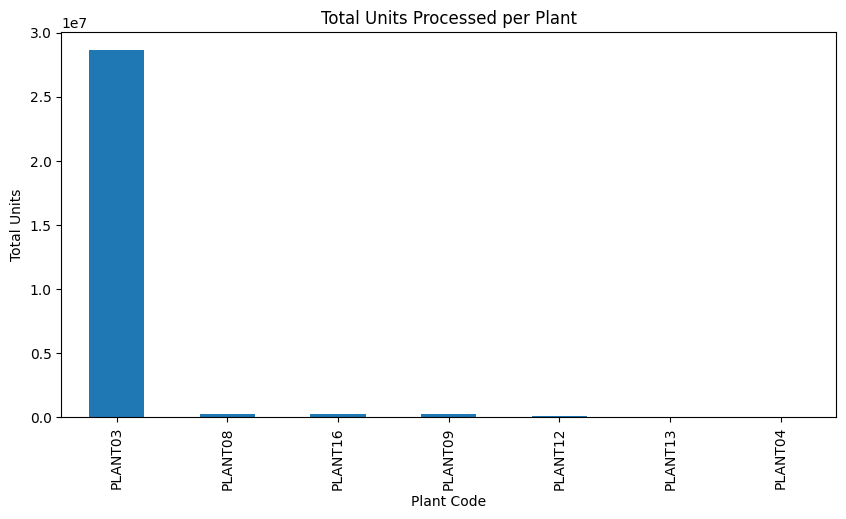

In [ ]:
#Most overloaded plants (by Unit quantity):
plant_load = df.groupby('Plant Code')['Unit quantity'].sum().sort_values(ascending=False)
plant_load.plot(kind='bar', figsize=(10,5), title='Total Units Processed per Plant')
plt.ylabel("Total Units")
plt.show()


#### 4.4.2 Orders per Destination Port

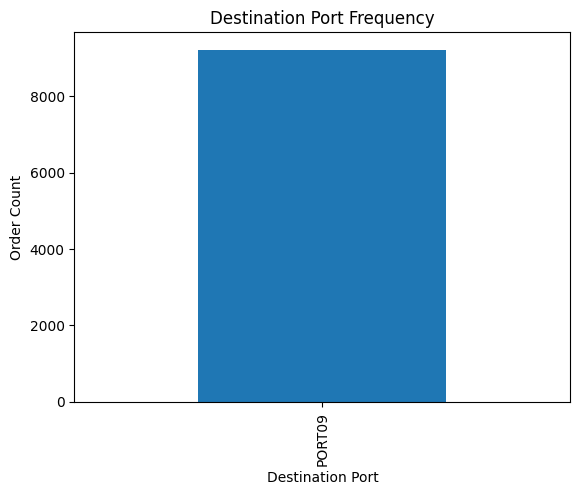

In [ ]:
#Orders per Destination Port:
df['Destination Port'].value_counts().plot(kind='bar', title='Destination Port Frequency')
plt.ylabel("Order Count")
plt.show()

## 5) Feature engineering



### 5.1 Weight per unit

**Weight per unit = Weight / Unit quantity**

Why?
- Shipping costs (from FreightRates) are often weight-dependent.
- But freight rates are usually per unit or per kg depending on the route and carrier.
- By calculating average weight per unit, you capture the density or heaviness of products, which can:
- Help identify high-cost orders.
- Allow you to cluster orders based on freight characteristics.
- Influence warehouse selection (e.g., avoid sending dense orders through expensive lanes).

In [ ]:
df['Weight per unit'] = df['Weight'] / df['Unit quantity']

### 5.2 IsLate = Ship Late Day count > 0

Why?
- SLA (Service Level Agreement) compliance is critical.
- If this flag is True, it indicates:
 - Missed delivery target.
 - Potential penalties or customer dissatisfaction.
- You can:
 - Quantify % of late shipments.
 - Analyze which routes/carriers/warehouses cause delays.
 - Prioritize alternate routing in optimization for high-late-risk orders.
- Helps in cost + penalty modeling.

In [ ]:
df['IsLate'] = df['Ship Late Day count'] > 0

### 5.3 IsEarly = Ship ahead day count > 0

Why?
- Early shipping isn’t always good — it can:
- Increase storage costs on the customer end.
- Lead to under-utilized transport capacity if shipments are split early.
- For optimization:
 - Early shipments may signal inefficiency in warehouse planning.
 - You can track if some plants habitually ship earlier than necessary.
 - Helps plan just-in-time (JIT) strategies better.

In [ ]:
df['IsEarly'] = df['Ship ahead day count'] > 0

In [ ]:
df.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight,Weight per unit,IsLate,IsEarly
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30,0.017698,False,True
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94,0.027585,False,True
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20,0.026255,False,True
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16,0.019079,False,True
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34,0.024198,False,True
